In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
data = pd.read_csv('Insurance_complaints__All_data.csv')

In [3]:
data

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords
0,1,METROPOLITAN LIFE INSURANCE COMPANY,Relative,Customer Service,No,Other,06/12/2012,07/25/2012,"Life, Accident and Health",Life & Annuity,Individual Life,NaN,13191,Ins Co - Licensed/Active,Organization,INDV,NaN
1,2,AETNA LIFE INSURANCE COMPANY,Provider,Delays (Claims Handling),No,Information Furnished,06/21/2012,08/01/2012,"Life, Accident and Health",Accident and Health,Group A&H,Insured,245,Ins Co - Licensed/Active,Organization,ORG,NaN
2,3,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/11/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
3,4,"BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISIO...",Provider,Denial Of Claim,No,Other,06/28/2012,07/30/2012,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,ORG,NaN
4,5,"CHARTER OAK FIRE INSURANCE COMPANY, THE",Insured,Unsatisfactory Settle/Offer,No,Question of Fact; Contract Language/Legal Issue,06/13/2012,07/17/2012,Property and Casualty,Automobile,Individual Private Pass,NaN,2918,Ins Co - Licensed/Active,Organization,INDV,2012 NORTH TEXAS TORNADOES; ADJUSTER'S HANDLIN...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244161,382809,State Farm Fire and Casualty Company,Insured,Denial Of Claim,No,Contract Language/Legal Issue; Company Positio...,12/27/2023,01/16/2024,Property and Casualty,Liability,Umbrella,NaN,1507,Ins Co - Licensed/Active,Organization,INDV,ADJUSTER'S HANDLING
244162,383095,Trisura Specialty Insurance Company,Insured,Customer Service; Delays (Claims Handling),No,Record Only,01/18/2024,01/19/2024,Property and Casualty,Automobile,Truckers Policy,Associated Subject Company; Associated Subject...,141633,Ins Co - Licensed/Active,Organization,INDV,ADJUSTER'S HANDLING
244163,383138,Mid-Century Insurance Company of Texas,Insured,Refund Of Premium,No,Premium Refunded; Contract Language/Legal Issue,01/02/2024,01/19/2024,Property and Casualty,Automobile,Individual Private Pass,NaN,3491,Ins Co - Licensed/Active,Organization,INDV,SENIOR CITIZEN
244164,383138,"MASTROIANNI, GABRIELLA ROSE",Insured,Misrepresentation,No,Information Furnished; Question of Fact,01/02/2024,01/19/2024,Property and Casualty,Automobile,Individual Private Pass,NaN,2659867,Agent,Individual,INDV,SENIOR CITIZEN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244166 entries, 0 to 244165
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Complaint number         244166 non-null  int64 
 1   Complaint filed against  244166 non-null  object
 2   Complaint filed by       244166 non-null  object
 3   Reason complaint filed   244160 non-null  object
 4   Confirmed complaint      244166 non-null  object
 5   How resolved             243144 non-null  object
 6   Received date            244166 non-null  object
 7   Closed date              244166 non-null  object
 8   Complaint type           244165 non-null  object
 9   Coverage type            244166 non-null  object
 10  Coverage level           244166 non-null  object
 11  Others involved          216080 non-null  object
 12  Respondent ID            244166 non-null  int64 
 13  Respondent Role          244164 non-null  object
 14  Respondent type     

In [5]:
data['Complaint filed by'].value_counts()

Insured                          123367
Third Party                       34694
Provider                          27760
Third Party Billing Service       16359
Other                             14776
Attorney                           5209
Relative                           4965
Consumer (Non-Insured)             4870
Lienholder                         2512
Agent                              2267
Beneficiary                        2158
Insurance Company                  1238
Physician                          1047
Non-Contracted Provider            1011
Contracted Provider                 806
Injured Employee                    543
Hospital                            267
Employer                            109
GR Other Government Office           91
Senior Citizen                       67
Military Personnel                   19
Person on behalf of patient          11
TDI                                   6
Teacher Retirement Syst (TRS)         6
DWC Qual Rev Complaint                2


In [6]:
data['Complaint filed against'].value_counts().head(30)

Blue Cross and Blue Shield of Texas, A Division of Health Care Service Corporation    19846
UnitedHealthcare Insurance Company                                                    15158
Aetna Life Insurance Company                                                           9218
PROGRESSIVE COUNTY MUTUAL INSURANCE COMPANY                                            6425
State Farm Mutual Automobile Insurance Company                                         5139
ALLSTATE FIRE AND CASUALTY INSURANCE COMPANY                                           4782
BLUE CROSS AND BLUE SHIELD OF TEXAS, A DIVISION OF HEALTH CARE SERVICE CORPORATION     4249
GEICO County Mutual Insurance Company                                                  3362
OLD AMERICAN COUNTY MUTUAL FIRE INSURANCE COMPANY                                      3254
United Healthcare Services, Inc.                                                       3099
Humana Insurance Company                                                        

In [7]:
# Data is to large for manipulation; therefore I selected one company to work with
sample = data[data['Complaint filed against']=='Blue Cross and Blue Shield of Texas, A Division of Health Care Service Corporation']

In [8]:
sample

,Complaint number,Complaint filed against,Complaint filed by,Reason complaint filed,Confirmed complaint,How resolved,Received date,Closed date,Complaint type,Coverage type,Coverage level,Others involved,Respondent ID,Respondent Role,Respondent type,Complainant type,Keywords
36113,56894,"Blue Cross and Blue Shield of Texas, A Divisio...",Insured,Delays (Claims Handling),No,No Jurisdiction,03/10/2014,08/06/2014,"Life, Accident and Health",Accident and Health,Group A&H,NaN,10047,Ins Co - Licensed/Active,Organization,INDV,SENIOR CITIZEN
42632,66156,"Blue Cross and Blue Shield of Texas, A Divisio...",Insured,Unsatisfactory Settle/Offer,No,Insufficient Information,06/12/2014,08/15/2014,"Life, Accident and Health",Accident and Health,Group A&H,Associated Subject Company; Associated Subject...,10047,Ins Co - Licensed/Active,Organization,INDV,NaN
43268,67120,"Blue Cross and Blue Shield of Texas, A Divisio...",Insured,Unsatisfactory Settle/Offer,No,Information Furnished; No Jurisdiction,06/23/2014,07/25/2014,"Life, Accident and Health",Accident and Health,Group A&H,Associated Subject Company; Insured,10047,Ins Co - Licensed/Active,Organization,INDV,CLAIM EVALUATION
43686,67768,"Blue Cross and Blue Shield of Texas, A Divisio...",Insured,Continuation of Benefits,No,Contract Language/Legal Issue,06/26/2014,08/21/2014,"Life, Accident and Health",Accident and Health,Individual A & H,Associated Subject Company; Associated Subject...,10047,Ins Co - Licensed/Active,Organization,INDV,FEDERAL HEALTH CARE REFORM
43995,68229,"Blue Cross and Blue Shield of Texas, A Divisio...",Insured,Unsatisfactory Settle/Offer,No,Information Furnished,06/30/2014,09/18/2014,"Life, Accident and Health",Accident and Health,Group A&H,Associated Subject Company,10047,Ins Co - Licensed/Active,Organization,INDV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244154,382458,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Other,No,Contract Language/Legal Issue; Information Fur...,01/10/2024,01/11/2024,"Life, Accident and Health",Accident and Health,Individual A & H,Correspondent Person; Portal - Company; Portal...,10047,Ins Co - Licensed/Active,Organization,ORG,MED PROVIDER/THIRDPARTY BILLER
244155,382551,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Unsatisfactory Settle/Offer; Usual And Customary,No,Contract Language/Legal Issue,01/11/2024,01/12/2024,"Life, Accident and Health",Accident and Health,Group A&H,Correspondent Person; Insured; Portal - Compan...,10047,Ins Co - Licensed/Active,Organization,ORG,AIR AMBULANCE; MED PROVIDER/THIRDPARTY BILLER
244157,382590,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Medical Necessity; Usual And Customary,No,Contract Language/Legal Issue,01/11/2024,01/12/2024,"Life, Accident and Health",Accident and Health,Group A&H,Insured; Portal - Company; Portal - Insured,10047,Ins Co - Licensed/Active,Organization,ORG,AIR AMBULANCE; EMERGENCY CARE; MED PROVIDER/TH...
244158,382600,"Blue Cross and Blue Shield of Texas, A Divisio...",Provider,Medical Necessity; Usual And Customary,No,Contract Language/Legal Issue,01/11/2024,01/12/2024,"Life, Accident and Health",Accident and Health,Group A&H,Correspondent Person; Insured; Portal - Compan...,10047,Ins Co - Licensed/Active,Organization,ORG,AIR AMBULANCE; EMERGENCY CARE; MED PROVIDER/TH...


In [9]:
insurance = sample[['Complaint filed by','Reason complaint filed','Confirmed complaint','Complaint type','Coverage type','Coverage level']]

In [10]:
insurance.fillna(0, inplace=True)

/home/lenovo/yes/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [11]:
insurance

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level
36113,Insured,Delays (Claims Handling),No,"Life, Accident and Health",Accident and Health,Group A&H
42632,Insured,Unsatisfactory Settle/Offer,No,"Life, Accident and Health",Accident and Health,Group A&H
43268,Insured,Unsatisfactory Settle/Offer,No,"Life, Accident and Health",Accident and Health,Group A&H
43686,Insured,Continuation of Benefits,No,"Life, Accident and Health",Accident and Health,Individual A & H
43995,Insured,Unsatisfactory Settle/Offer,No,"Life, Accident and Health",Accident and Health,Group A&H
...,...,...,...,...,...,...
244154,Provider,Other,No,"Life, Accident and Health",Accident and Health,Individual A & H
244155,Provider,Unsatisfactory Settle/Offer; Usual And Customary,No,"Life, Accident and Health",Accident and Health,Group A&H
244157,Provider,Medical Necessity; Usual And Customary,No,"Life, Accident and Health",Accident and Health,Group A&H
244158,Provider,Medical Necessity; Usual And Customary,No,"Life, Accident and Health",Accident and Health,Group A&H


In [12]:
from sklearn.preprocessing import OrdinalEncoder

In [13]:
enc = OrdinalEncoder()

In [14]:
enc_data= enc.fit_transform(insurance)

In [15]:
enc_data.shape

(19846, 6)

In [16]:
enc_data = pd.DataFrame(enc_data, columns=['Complaint filed by','Reason complaint filed','Confirmed complaint','Complaint type','Coverage type','Coverage level'])

In [17]:
enc_data

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level
0,9.0,1158.0,0.0,6.0,0.0,2.0
1,9.0,1962.0,0.0,6.0,0.0,2.0
2,9.0,1962.0,0.0,6.0,0.0,2.0
3,9.0,836.0,0.0,6.0,0.0,5.0
4,9.0,1962.0,0.0,6.0,0.0,2.0
...,...,...,...,...,...,...
19841,14.0,1876.0,0.0,6.0,0.0,5.0
19842,14.0,1963.0,0.0,6.0,0.0,2.0
19843,14.0,1830.0,0.0,6.0,0.0,2.0
19844,14.0,1830.0,0.0,6.0,0.0,2.0


In [18]:
# The encoded data needs scaling as there are huge variances inside
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
scaled_data=scaler.fit_transform(enc_data)

In [21]:
scaled_data = pd.DataFrame(scaled_data, columns=['Complaint filed by','Reason complaint filed','Confirmed complaint','Complaint type','Coverage type','Coverage level'])

In [22]:
scaled_data

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level
0,-0.772092,-0.100275,-0.406302,0.5767,-0.032728,-0.706503
1,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
2,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
3,-0.772092,-0.654970,-0.406302,0.5767,-0.032728,1.402591
4,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
...,...,...,...,...,...,...
19841,0.563916,1.136591,-0.406302,0.5767,-0.032728,1.402591
19842,0.563916,1.286462,-0.406302,0.5767,-0.032728,-0.706503
19843,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503
19844,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503


In [23]:
# find optimal clusters using elbow method

In [24]:
from sklearn.cluster import KMeans

In [25]:
def random_clusters(scaled_data, max_k):
    means = []
    inertias = []
    
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k, random_state=100)
        kmeans.fit(scaled_data)
        
        means.append(k)
        inertias.append(kmeans.inertia_)

    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')
    plt.grid(True)


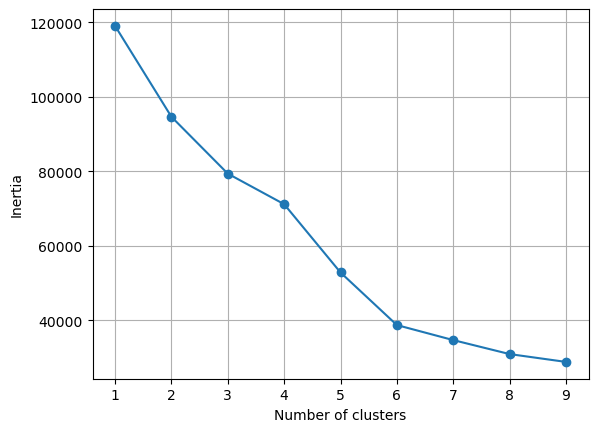

In [26]:
clusters = random_clusters(scaled_data, 10)

In [55]:
kmeans = KMeans(n_clusters=6, random_state=100)

In [56]:
kmeans.fit_transform(scaled_data)

array([[ 1.67131579,  3.34712858,  2.71706522,  2.6854942 , 28.4592072 ,
         0.95215006],
       [ 1.53741311,  3.53598044,  3.22804525,  2.61998801, 28.46960459,
         2.32378255],
       [ 1.53741311,  3.53598044,  3.22804525,  2.61998801, 28.46960459,
         2.32378255],
       ...,
       [ 0.35563558,  3.40215422,  3.31921316,  2.22099333, 28.49406692,
         2.47345595],
       [ 0.35563558,  3.40215422,  3.31921316,  2.22099333, 28.49406692,
         2.47345595],
       [ 0.35563558,  3.40215422,  3.31921316,  2.22099333, 28.49406692,
         2.47345595]])

In [57]:
pred = kmeans.predict(scaled_data)

In [58]:
pred

array([5, 0, 0, ..., 0, 0, 0], dtype=int32)

In [60]:
 scaled_data['clusters']=kmeans.labels_

In [61]:
scaled_data

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level,clusters
0,-0.772092,-0.100275,-0.406302,0.5767,-0.032728,-0.706503,5
1,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
2,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
3,-0.772092,-0.654970,-0.406302,0.5767,-0.032728,1.402591,5
4,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
...,...,...,...,...,...,...,...
19841,0.563916,1.136591,-0.406302,0.5767,-0.032728,1.402591,3
19842,0.563916,1.286462,-0.406302,0.5767,-0.032728,-0.706503,0
19843,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503,0
19844,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503,0


In [62]:
scaled_data['clusters'].value_counts()

0    6269
5    5294
2    2864
1    2807
3    2589
4      23
Name: clusters, dtype: int64

In [63]:
scaled_data[scaled_data['clusters']==0]

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level,clusters
1,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
2,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
4,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503,0
14,-0.772092,1.184826,-0.406302,0.5767,-0.032728,-0.706503,0
18,0.563916,-0.358674,-0.406302,0.5767,-0.032728,-0.706503,0
...,...,...,...,...,...,...,...
19840,0.563916,1.288185,-0.406302,0.5767,-0.032728,-0.706503,0
19842,0.563916,1.286462,-0.406302,0.5767,-0.032728,-0.706503,0
19843,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503,0
19844,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503,0


In [67]:
clusters = pd.DataFrame(scaled_data['clusters'])

In [68]:
clusters.shape

(19846, 1)

In [69]:
unique, counts = np.unique(pred, return_counts=True)

In [70]:
counts.shape

(6,)

In [71]:
counts = counts.reshape(1,6)

In [72]:
counts = pd.DataFrame(counts, columns=['A','B','C','D','E','F'])

In [73]:
counts

,A,B,C,D,E,F
0,6269,2807,2864,2589,23,5294


In [37]:
target_names = ['A','B','C','D','E','F']

In [38]:
scaled_data

,Complaint filed by,Reason complaint filed,Confirmed complaint,Complaint type,Coverage type,Coverage level
0,-0.772092,-0.100275,-0.406302,0.5767,-0.032728,-0.706503
1,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
2,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
3,-0.772092,-0.654970,-0.406302,0.5767,-0.032728,1.402591
4,-0.772092,1.284740,-0.406302,0.5767,-0.032728,-0.706503
...,...,...,...,...,...,...
19841,0.563916,1.136591,-0.406302,0.5767,-0.032728,1.402591
19842,0.563916,1.286462,-0.406302,0.5767,-0.032728,-0.706503
19843,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503
19844,0.563916,1.057349,-0.406302,0.5767,-0.032728,-0.706503


In [39]:
# plotting to see how each cluster is represented
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [40]:
pca = PCA(n_components=2, random_state=100)

In [41]:
X = scaled_data
y = pred

In [42]:
pca_X=pca.fit_transform(X)

In [43]:
pca_X.shape

(19846, 2)

In [44]:
# variance percentage for each components
print('Explained variance ratio (first two components): %s'%str(pca.explained_variance_ratio_))

Explained variance ratio (first two components): [0.25678388 0.24828572]


Text(0.5, 1.0, 'PCA of data points')

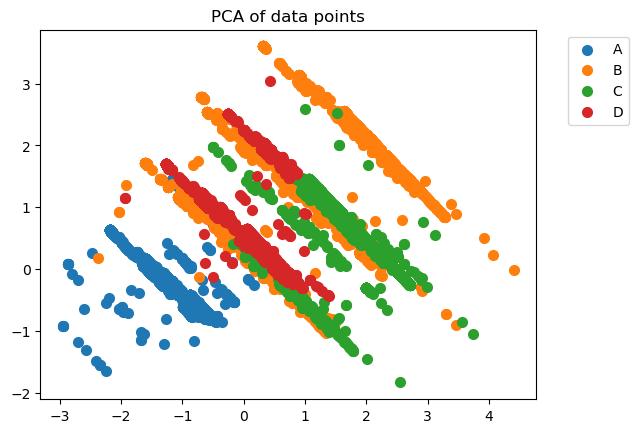

In [45]:
# plotting the data
colors = ['red','darkorange','green','blue']

for color, i, target_names in zip(colors, [0,1,2,3], target_names):
    plt.scatter(pca_X[y== i,0], pca_X[y== i,1], linewidths=2, label=target_names)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.legend(bbox_to_anchor=(1.05, 1),loc=2)
plt.title('PCA of data points')

In [49]:
counts[counts['A']]

KeyError: "None of [Int64Index([6269], dtype='int64')] are in the [columns]"